In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
import pandas as pd
import numpy as np

In [25]:
x_train = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_train_inputs.csv')
y_train = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_train_targets.csv')
x_test = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_testing_inputs.csv')
y_test = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_testing_targets.csv')


x_train = x_train.drop('sensor_signal', axis = 1)
x_test = x_test.drop('sensor_signal', axis = 1)


In [26]:
x_train = x_train.drop(['BSC', 'FKL', 'FOL', 'SDL', 'CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'STD',
       'STN', 'STU', 'WAL'], axis = 1)
x_test = x_test.drop(['BSC', 'FKL', 'FOL', 'SDL', 'CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'STD',
       'STN', 'STU', 'WAL'], axis = 1)

In [16]:
x_train = pd.DataFrame(x_train)
x_train = x_train.fillna(0)
x_train = np.array(x_train)

y_train = pd.DataFrame(y_train)
y_train = y_train.fillna(0)
y_train = np.array(y_train)

x_test = pd.DataFrame(x_test)
x_test = x_test.fillna(0)
x_test = np.array(x_test)

y_test = pd.DataFrame(y_test)
y_test = y_test.fillna(0)
y_test = np.array(y_test)

In [17]:
y_train = np.reshape(y_train, [y_train.shape[0],])
y_test = np.reshape(y_test, [y_test.shape[0],])
y_train.shape

(379,)

In [18]:
reg = LogisticRegression(max_iter = 10000)
lo_reg = reg.fit(x_train,y_train)
model_outputs = reg.predict(x_test)
reg.score(x_test,y_test)


0.9894736842105263

In [22]:
x_test = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_testing_inputs.csv')

x_test = x_test.drop('sensor_signal', axis = 1)

x_test = x_test.drop(['BSC', 'FKL', 'FOL', 'SDL', 'CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'STD',
       'STN', 'STU', 'WAL'], axis = 1)
feature_name = x_test.columns.values
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,Aver_25_x,1.197489
1,Aver_25_y,1.019357
2,Aver_25_z,0.696999
3,Aver_75_x,-0.211466
4,Aver_75_y,-2.096159
5,Aver_75_z,-0.184109
6,n_peak_x,-1.650460
7,n_peak_y,-2.217456
8,n_peak_z,-0.712073
9,P_peak_x,-0.125205


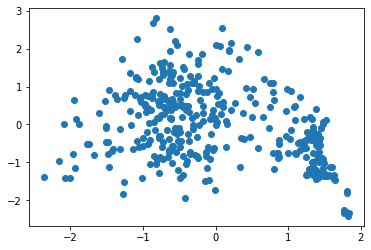

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x_train['Aver_25_y'], x_train['std_z'])
 ### the scatter plot with higher attributed weight (>0), we can see that it is easier to classify the data through these two variables

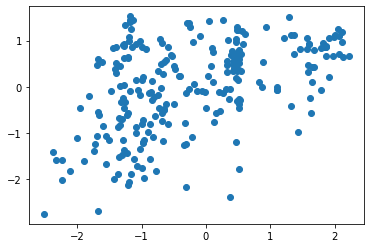

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x_train['Aver_75_y'], x_train['n_peak_y'])
 ### the scatter plot with lower attributed weight (<0), we can see that it is hard to classify the data through these two variables

# Sensitivity, specificity and accuracy (evaluation)

In [33]:
def sensitivity_specificity_accuracy(training_target_data):
    # True positive
    truth = training_target_data.reshape([training_target_data.shape[0],])
    test_result = model_outputs
    TP_count = 0
    for i in range(len(truth)):
        if test_result[i] :
            if test_result[i] == truth[i]:
                TP_count = TP_count + 1
    TP_count

    # False positive
    truth = training_target_data.reshape([training_target_data.shape[0],])
    test_result = model_outputs
    FP_count = 0
    for i in range(len(truth)):
        if test_result[i] :
            if test_result[i] != truth[i]:
                FP_count = FP_count + 1
    FP_count

    # False Negative
    truth = training_target_data.reshape([training_target_data.shape[0],])
    test_result = model_outputs
    FN_count = 0
    for i in range(len(truth)):
        if test_result[i] == 0:
            if test_result[i] != truth[i]:
                FN_count = FN_count + 1
    FN_count

    # True Negative
    truth = training_target_data.reshape([training_target_data.shape[0],])
    test_result = model_outputs
    TN_count = 0
    for i in range(len(truth)):
        if test_result[i] == 0:
            if test_result[i] == truth[i]:
                TN_count = TN_count + 1
    TN_count


    sensitivity = TP_count / (TP_count + FN_count)
    specificity = TN_count / (TN_count + FP_count)
    accuracy = sum(truth == test_result) / len(truth)
    

    return sensitivity, specificity, accuracy

In [34]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
training_target_data = y_test
sensitivity, specificity, accuracy = sensitivity_specificity_accuracy(training_target_data)

In [36]:
sensitivity

0.9666666666666667

In [37]:
specificity

0.9846153846153847

In [38]:
accuracy

0.9789473684210527

In [31]:
print('accuracy:', accuracy, 'sensitivity:', sensitivity, 'specificity:', specificity)

NameError: name 'accuracy' is not defined

# Cross validation and evaluation

In [39]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [40]:
### decision_value = x1 * weight1 + bias

train_predict = cross_val_predict(lo_reg, x_train, y_train, cv = 3, method = 'decision_function')
train_predict_result = cross_val_predict(lo_reg, x_train, y_train, cv = 3)

np.set_printoptions(suppress=True)
train_predict_result
train_predict = train_predict.reshape([len(train_predict), 1])

In [41]:
y_train = y_train.reshape([len(y_train), 1])
y_train

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [44]:
p = precision_score(y_train, train_predict_result, average = 'binary')
r = recall_score(y_train, train_predict_result, average = 'binary')
f1 = f1_score(y_train, train_predict_result, average = 'binary')

In [45]:
p  # precision = TP / (TP + FP), the accuracy of positive prediction

0.9191919191919192

In [46]:
r # recall = sensitivity = TP / (TP + FN), true positive rate

0.8921568627450981

In [47]:
f1

0.9054726368159205

In [89]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, threshold = precision_recall_curve(y_train, train_predict)

def plot_decision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'b--', label = 'precision')
    plt.plot(threshold, recall[:-1], 'g-', label = 'recall')
    plt.xlabel('decision_threshold')
    plt.ylabel('result')
    plt.legend()

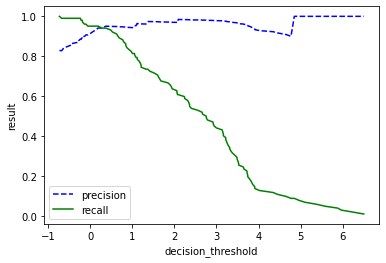

In [90]:
plot_decision_recall_vs_threshold(precision, recall, threshold)

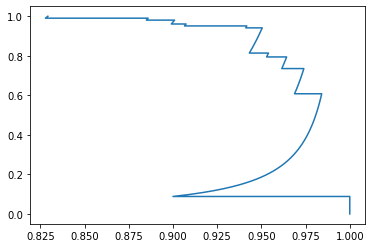

In [91]:
plt.plot(precision, recall)

In [92]:
from sklearn.metrics import roc_curve

In [93]:
fpr, tpr, threshold = roc_curve(y_train, train_predict)

In [94]:
### sensitivity = true positive rate
### specificity = true negative rate = 1 - false negative rate

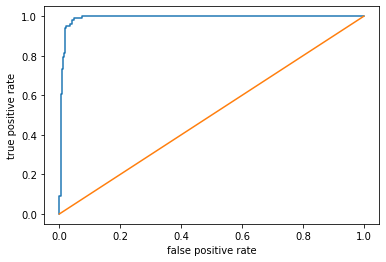

In [95]:
## ROC curve, reciever operating characteristic (fpr vs tpr)


plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')


### AUC = accuracy

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, train_predict)

In [96]:
auc

0.9914348410844482

# Grid search

In [97]:
from sklearn.model_selection import GridSearchCV
log = LogisticRegression()
grid_values = {'penalty': ['l2', 'l1'], 'C': [0.001, 0.09, 0.1, 1, 10, 0.0005]}
grid_search = GridSearchCV(log, param_grid = grid_values, return_train_score = True)
grid_search.fit(y_train, train_predict_result)

C:\Users\a1003\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\a1003\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\a1003\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\a1003\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\a1003\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.09, 0.1, 1, 10, 0.0005],
                         'penalty': ['l2', 'l1']},
             return_train_score=True)

In [98]:
grid_search.best_params_

{'C': 0.09, 'penalty': 'l2'}

In [99]:
grid_search.best_estimator_

LogisticRegression(C=0.09)